# Getting familiar with NN structures
Use Neural Networks to fit the following functions ${f}$, with adequate choices of number of layers,
neurons and activation functions, in a broad interval of x: <br>
 i) $f(x) = sin(x)$; <br>
 ii) $f(x) = e^{−x^2}$; <br>
 iii) $f(x) = ln(x)$; <br>
 iv) $f(x) = Θ(x)e^{−x} −Θ(−x)e^x$, where Θ is the Heaviside step function; <br>
 You should build a set of ∼ 103 points, and then take 90% and 10% for tests. Use the mean
 squared error as a loss function, and train the networks using the Adam optimizer. Plot both
 the training and test loss. Then, create a new separate validation set and compute the ROC
 curve and the associated AUC.

Epoch 0, Train Loss: 0.7034543752670288, Test Loss: 0.5802832245826721
Epoch 200, Train Loss: 0.28635087609291077, Test Loss: 0.24997974932193756
Epoch 400, Train Loss: 0.1562165766954422, Test Loss: 0.16201382875442505
Epoch 600, Train Loss: 0.1181265339255333, Test Loss: 0.12681572139263153
Epoch 800, Train Loss: 0.09856881201267242, Test Loss: 0.10695535689592361
Epoch 1000, Train Loss: 0.06320484727621078, Test Loss: 0.06782840937376022
Epoch 1200, Train Loss: 0.02803085930645466, Test Loss: 0.029100818559527397
Epoch 1400, Train Loss: 0.011082637123763561, Test Loss: 0.011009227484464645
Epoch 1600, Train Loss: 0.004896941594779491, Test Loss: 0.004983117803931236
Epoch 1800, Train Loss: 0.0022084282245486975, Test Loss: 0.0022850700188428164


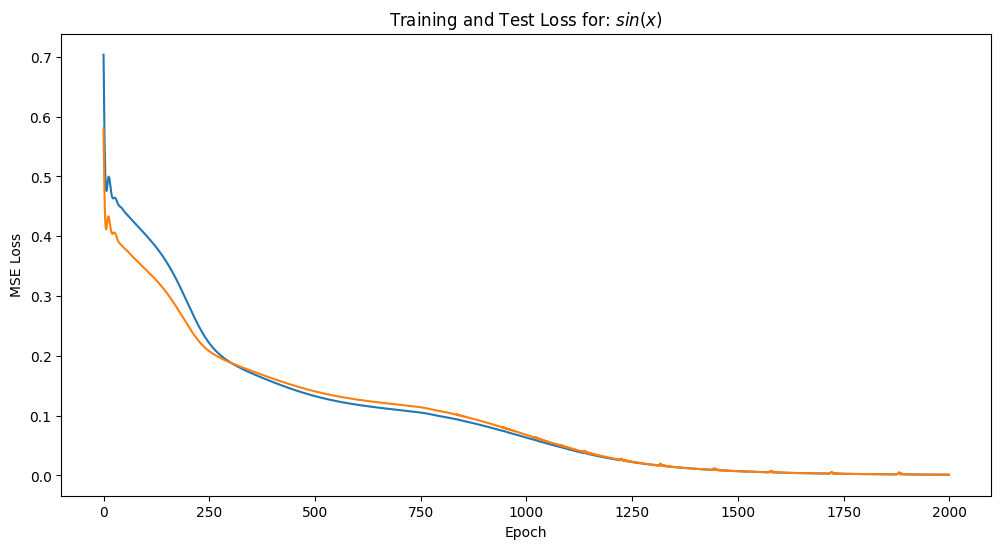

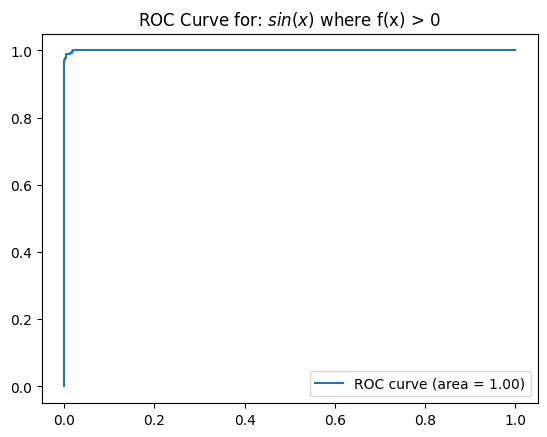

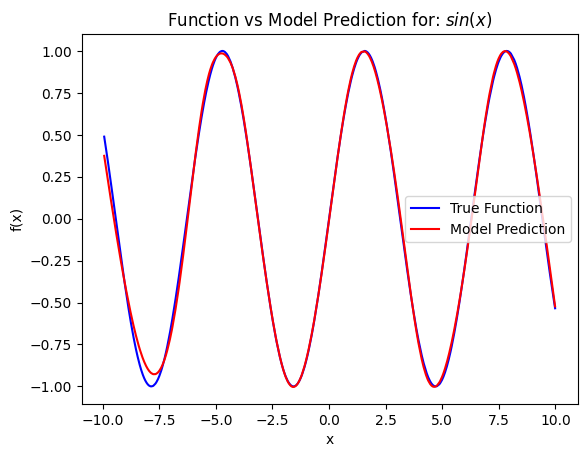

Epoch 0, Train Loss: 0.1328553408384323, Test Loss: 0.14001032710075378
Epoch 200, Train Loss: 0.00869454350322485, Test Loss: 0.010072722099721432
Epoch 400, Train Loss: 0.0017560776323080063, Test Loss: 0.0018677416956052184
Epoch 600, Train Loss: 0.0004866436356678605, Test Loss: 0.0004703988379333168
Epoch 800, Train Loss: 0.00014265807112678885, Test Loss: 0.00013510871212929487
Epoch 1000, Train Loss: 4.769102088175714e-05, Test Loss: 4.7064524551387876e-05
Epoch 1200, Train Loss: 2.374391260673292e-05, Test Loss: 2.5052844648598693e-05
Epoch 1400, Train Loss: 1.7132579159806482e-05, Test Loss: 1.8655551684787497e-05
Epoch 1600, Train Loss: 1.4373591511684936e-05, Test Loss: 1.572332257637754e-05
Epoch 1800, Train Loss: 1.2571244951686822e-05, Test Loss: 1.3736291293753311e-05


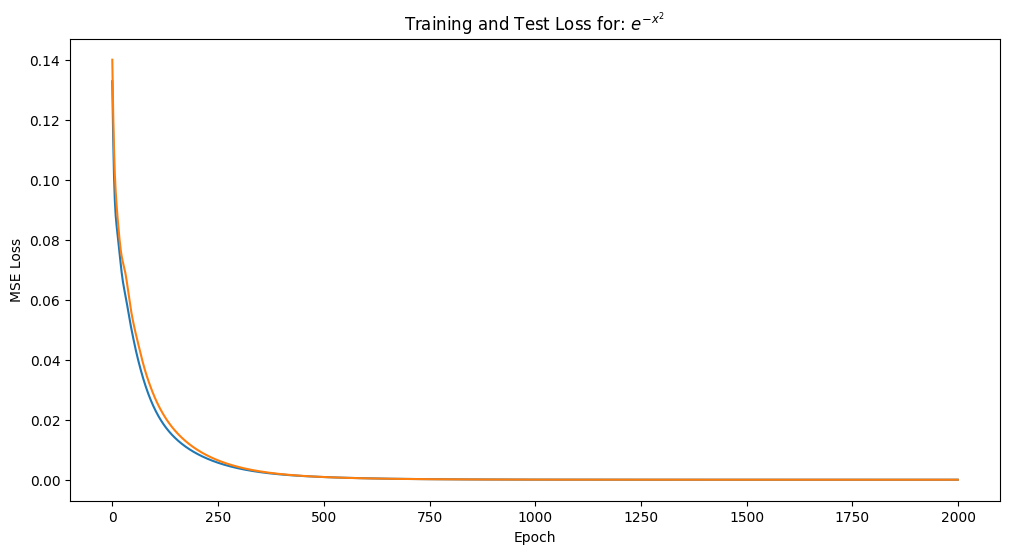

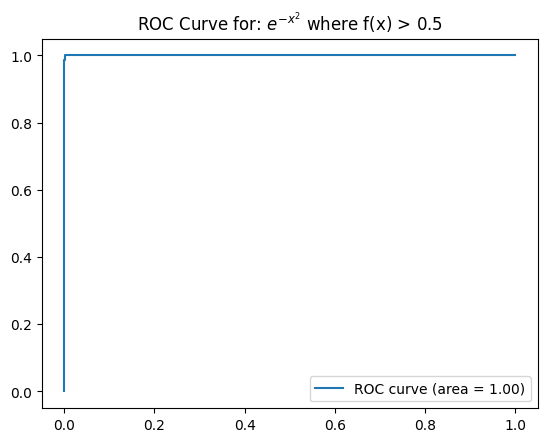

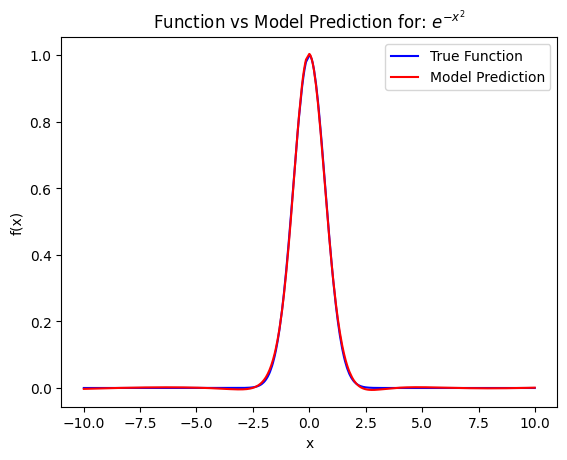

Epoch 0, Train Loss: 9.427489280700684, Test Loss: 9.779315948486328
Epoch 200, Train Loss: 0.2463107705116272, Test Loss: 0.1644631326198578
Epoch 400, Train Loss: 0.13759955763816833, Test Loss: 0.05919457599520683
Epoch 600, Train Loss: 0.11216840893030167, Test Loss: 0.03638523072004318
Epoch 800, Train Loss: 0.09697528928518295, Test Loss: 0.024354293942451477
Epoch 1000, Train Loss: 0.08549327403306961, Test Loss: 0.016536101698875427
Epoch 1200, Train Loss: 0.07650374621152878, Test Loss: 0.01155614573508501
Epoch 1400, Train Loss: 0.06942026317119598, Test Loss: 0.008589601144194603
Epoch 1600, Train Loss: 0.06364249438047409, Test Loss: 0.006935007404536009
Epoch 1800, Train Loss: 0.05875873565673828, Test Loss: 0.006135800387710333


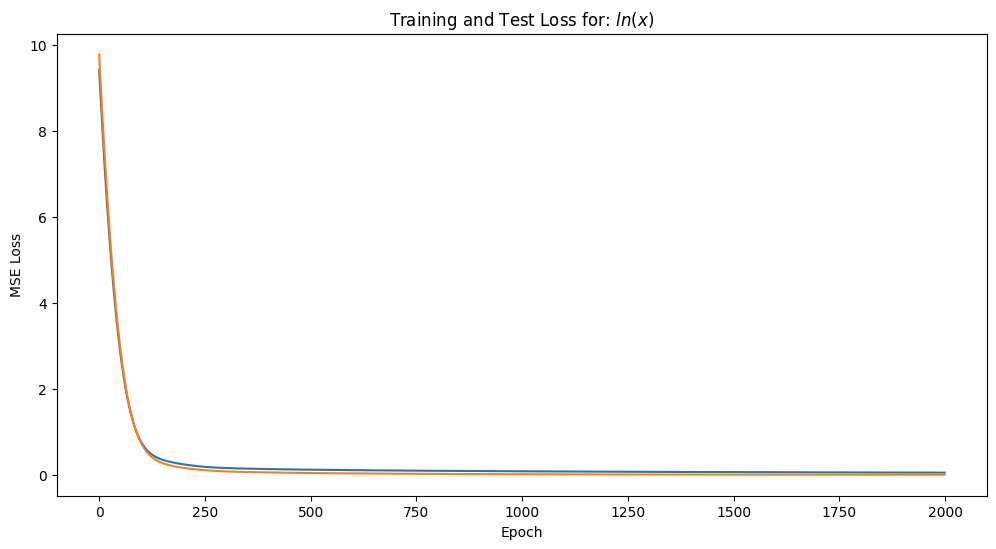

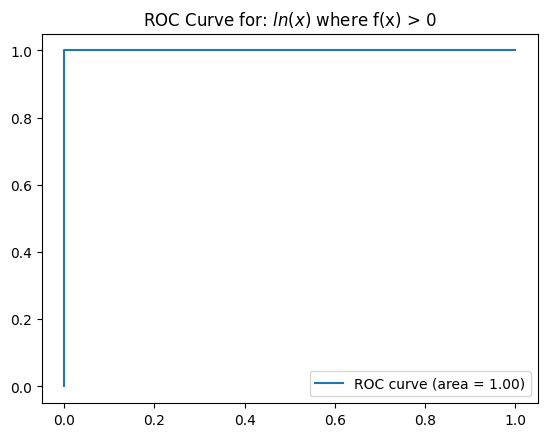

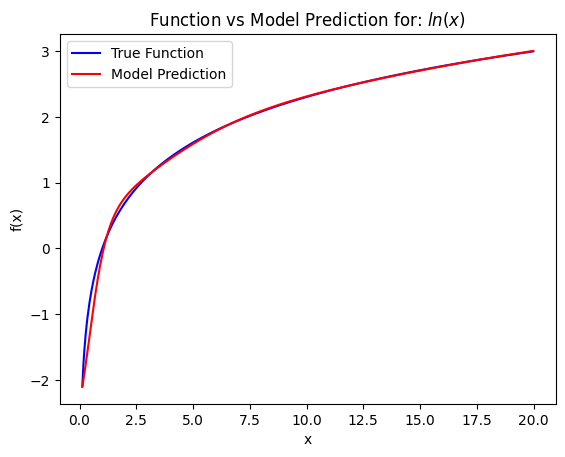

Epoch 0, Train Loss: 0.06341911852359772, Test Loss: 0.06245702877640724
Epoch 200, Train Loss: 0.011183611117303371, Test Loss: 0.019781993702054024
Epoch 400, Train Loss: 0.0041952794417738914, Test Loss: 0.015650814399123192
Epoch 600, Train Loss: 0.0023312733974307775, Test Loss: 0.01378414873033762
Epoch 800, Train Loss: 0.001725363195873797, Test Loss: 0.011202502064406872
Epoch 1000, Train Loss: 0.0013934721937403083, Test Loss: 0.009660288691520691
Epoch 1200, Train Loss: 0.0012292795581743121, Test Loss: 0.008919444866478443
Epoch 1400, Train Loss: 0.0011139067355543375, Test Loss: 0.0076910872012376785
Epoch 1600, Train Loss: 0.0010333427926525474, Test Loss: 0.00637581292539835
Epoch 1800, Train Loss: 0.0008939592516981065, Test Loss: 0.005098242778331041


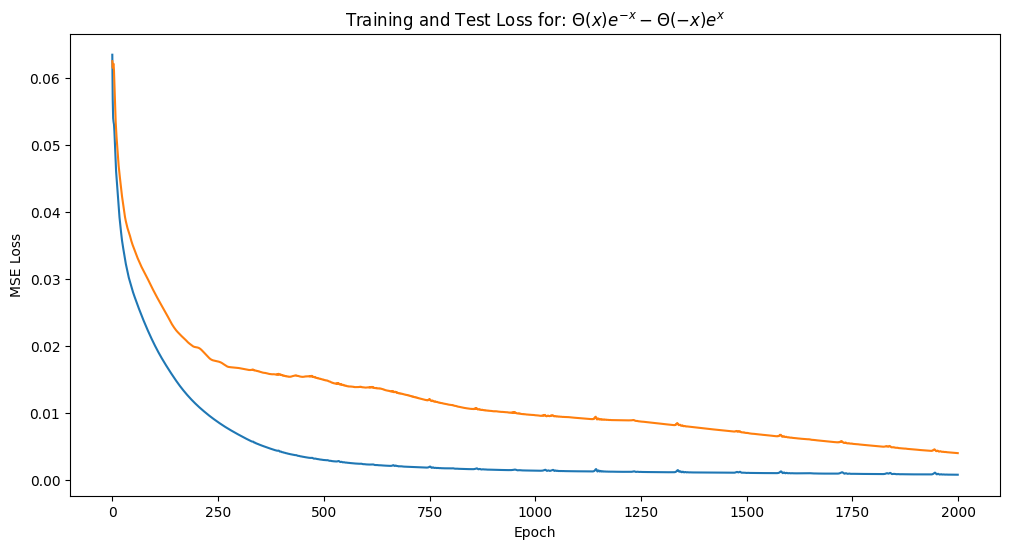

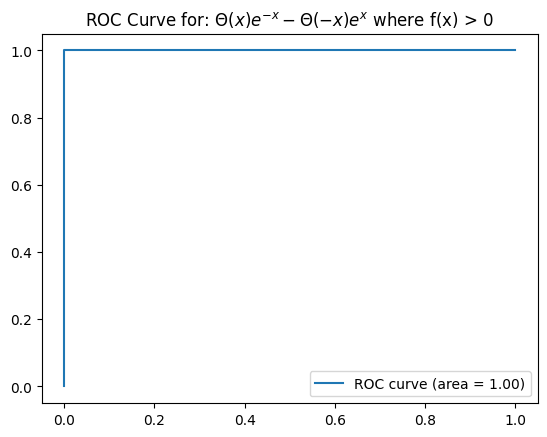

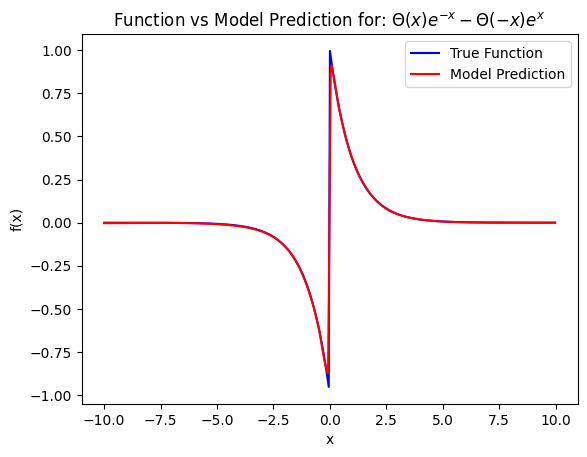

In [2]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

torch.manual_seed(42)
np.random.seed(42)

def f1(x):
    return np.sin(x)

def f2(x):
    return np.exp(-x**2)

def f3(x):
    return np.log(x)

def f4(x):
    return np.where(x >= 0, np.exp(-x), -np.exp(x))

def parts(function, nn_layers, epochs, x_range, classification, title):

    x = np.random.uniform(x_range[0], x_range[1], 1000)
    y = function(x)

    x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

    x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.1, random_state=42)

    class Network(nn.Module):
        def __init__(self):
            super(Network, self).__init__()
            self.layers = nn_layers

        def forward(self, x):
            return self.layers(x)

    model = Network()
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_losses, test_losses = [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
        
        model.eval()
        with torch.no_grad():
            y_test_pred = model(x_test)
            test_loss = criterion(y_test_pred, y_test)
            test_losses.append(test_loss.item())
        
        if epoch % 200 == 0:
            print(f'Epoch {epoch}, Train Loss: {loss.item()}, Test Loss: {test_loss.item()}')

    # Loss Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title('Training and Test Loss for: ' + title)
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.show()

    # ROC curve
    x_val = np.random.uniform(x_range[0], x_range[1], 1000)
    y_val = function(x_val)
    x_val_t = torch.tensor(x_val, dtype=torch.float32).view(-1, 1)
    y_val_pred = model(x_val_t).detach().numpy()

    y_true_cls = (y_val > classification).astype(int)
    y_pred_score = y_val_pred.ravel()

    fpr, tpr, _ = roc_curve(y_true_cls, y_pred_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.legend()
    plt.title('ROC Curve for: ' + title + ' where f(x) > ' + str(classification))
    plt.show()

    # Function VS Prediction
    plt.plot(x_val[np.argsort(x_val)], y_val[np.argsort(x_val)], label='True Function', color='blue')
    plt.plot(x_val[np.argsort(x_val)], y_val_pred[np.argsort(x_val)], label='Model Prediction', color='red')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.title('Function vs Model Prediction for: ' + title)
    plt.show()

l1 = nn.Sequential(nn.Linear(1, 32), nn.Tanh(), nn.Linear(32, 32), nn.Tanh(), nn.Linear(32, 1))
parts(f1, l1, 2000, (-10, 10), 0, '$sin(x)$')

l2 = nn.Sequential(nn.Linear(1, 32), nn.Tanh(), nn.Linear(32, 1))
parts(f2, l2, 2000, (-10, 10), 0.5, '$e^{-x^2}$')

l3 = nn.Sequential(nn.Linear(1, 32), nn.Tanh(), nn.Linear(32, 1))
parts(f3, l3, 2000, (0, 20), 0, '$ln(x)$')

l4 = nn.Sequential(nn.Linear(1, 32), nn.Tanh(), nn.Linear(32, 32), nn.ReLU(), nn.Linear(32, 1))
parts(f4, l4, 2000, (-10, 10), 0, '$Θ(x)e^{-x} - Θ(-x)e^{x}$')